<a href="https://colab.research.google.com/github/monikamikhaiel/graduation-project-/blob/main/Multiple_Antennas_qtable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # for array stuff and random
import matplotlib.pyplot as plt  # for graphing our mean rewards over time
from matplotlib import style  # to make pretty charts because it matters.
import time  # using this to keep track of our saved Q-Tables.
import cv2

style.use("ggplot")  # setting our style!

In [2]:
# area
#im = cv2.imread('/content/room.jpg')
#width = int(im.shape[1] * 50 / 100)
#height = int(im.shape[0] * 50 / 100)

# dsize
#dsize = (width, height)

# resize image
#output = cv2.resize(im, dsize)

#print(im.shape)
SIZE_W = 5
SIZE_H = 5
print(SIZE_H,SIZE_W)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

5 5


In [21]:
HM_EPISODES = 2500
epsilon = 0.5  # randomness
EPS_DECAY = 0.9999  # Every episode will be epsilon*EPS_DECAY
SHOW_EVERY = 100  # how often to play through env visually.

start_q_table = None  # if we have a pickled Q table, we'll put the filename of it here.

LEARNING_RATE = 0.1
DISCOUNT = 0.95
ANTENNA_N = int(input("please enter the number of antennas ?"))  # NUMBER OF ANTENNAS 

# the dict! Using just for colors
d = {1: (255, 175, 0) }  # Antenna color blue
#SNR RANGES
snr_range={"highSNR_max":-50,"highSNR_min":-80,
           "mediumSNR_max":-90,"mediumSNR_min":-100,
          "deadzone":-120}


please enter the number of antennas ?3


In [4]:
#antenna
class antenna:
    def __init__(self):
        self.x = np.random.randint(0, SIZE_W)
        self.y = np.random.randint(0, SIZE_H)
    def __str__(self):
        return f"{self.x}, {self.y}"
    def __sub__(self, other):
        return (self.x-other.x, self.y-other.y)
    def action(self, choice):
        '''
        Gives us 4 total movement options. (0,1,2,3)
        '''
        if choice == 0:  #up
            #self.move(x=0, y=1)
            self.x=self.x
            self.y+=1
            self.move()

        elif choice == 1:  #down
            #self.move(x=0, y=-1)
            self.x=self.x
            self.y-=1
            self.move()

        elif choice == 2:  #left
           # self.move(x=-1, y=0)
            self.x-=1
            self.y=self.y
            self.move()

        elif choice == 3:    #right
            # self.move(x=1, y=0)
            self.x+=1
            self.y=self.y
            self.move()

#    def move(self, x=False, y=False):
    def move(self):
        # If no value for x, move randomly
      #  if not x:
      #      self.x += np.random.randint(-1, 2)
       # elif x==0:
      #      self.x=self.x
      #  else:
       #     self.x += x

        # If no value for y, move randomly
       # if not y:
        #    self.y += np.random.randint(-1, 2)
       # elif y==0:
        #    self.y=self.y
       # else:
        #    self.y += y
      # If we are out of bounds, fix!
        if self.x < 0:
            self.x = 0
        elif self.x > SIZE_W-1:
            self.x = SIZE_W-1
        if self.y < 0:
            self.y = 0
        elif self.y > SIZE_H-1:
            self.y = SIZE_H-1



In [5]:
ant = antenna()
print(ant)
ant.action(0) # up
print(ant)
ant.action(1) #down 
print(ant)
ant.action(2) #left
print(ant)
ant.action(3) #right 
print(ant)


2, 0
2, 1
2, 0
1, 0
2, 0


In [22]:
x = SIZE_W # Building X
y = SIZE_H # Building Y
z = 4 # actions
## increase the size of a qtable dynamically from the number of antennas 
q_table={}
for i in range(ANTENNA_N):
  q_table[i]=np.zeros((x,y,z))
  print(q_table[i].shape)

#print(q_table)
# q_table *= 0

(5, 5, 4)
(5, 5, 4)
(5, 5, 4)


In [7]:
#okomora model 
def okomora(ant,SIZE_H,SIZE_W):
  PathLoss=[]
  attenuation= 13 #in db function of frequency and distance 
  freq= 2.4*(10^9) # the frequency og the signal
  c= 3*(10^8) # the speed of light
  #hte = input("please enter the height of the transmitter antenna ? ")
  #hre = input("please enter the height of the receiver antenna ? ")
  hte= 20
  hre= 2
  G_hte = 10*np.log(int(hte) /200) 
  G_hre = 10*np.log(int(hre)/ 3)
  G_Area =27 # (Quasi Open Area)
  for i in range(SIZE_H):
    for j in range(SIZE_W):
      difference = [ant.x-i,ant.y-j]
      if difference == [0,0]:
        continue
      else:
        ## calculate the pathloss
        distance=pow((pow(difference[0],2)+pow(difference[1],2)),0.5)
        FPL      = 20*np.log(4*np.pi*distance*freq/c)
        Path_Loss = FPL + attenuation - G_hte - G_hre - G_Area
        PathLoss.append(Path_Loss)
  return PathLoss  
#len(okomora(ant,SIZE_H,SIZE_W))

In [8]:
def AnglesInDegrees(ant,SIZE_H,SIZE_W):
  theta=[]
  for i in range(SIZE_H):
    for j in range(SIZE_W):
      difference = [ant.x-i,ant.y-j]
      if difference==[0,0]: # the same position as the antenna 
        continue
      if difference[0]==0:     # the angle itself is either 90 or 270 tan will be infinite 
          if difference[1]>0:
            t=90
            theta.append(90)
          else:
            t=270
            theta.append(270)
      else:
          tantheta= difference[1]/difference[0]
          t=np.degrees(np.arctan(tantheta))
          if t <=0:
            t+=360
            theta.append(t)
          else:
            theta.append(t)
  return theta
#print(len(AnglesInDegrees(ant,SIZE_H,SIZE_W)))

In [9]:
def measureSNR(ant,SIZE_H,SIZE_W,type="omnidirectionnel"):
  Path_Loss=okomora(ant,SIZE_H,SIZE_W)
  Gain=[]
  if type == "omnidirectionnel" :
    Gain_pannel=7 #in db
    for i in range(len(Path_Loss)):
      Gain.append(Gain_pannel-Path_Loss[i])
  elif type== "directionnel":
    thetas=AnglesInDegrees(ant,SIZE_H,SIZE_W)
    GainVsTheta={360:-20,30:-10,60:-5,90:15,120:0,150:-10,180:-20,210:-10,240:-8,270:-15,300:-8,330:-10} # values in db angle:gain
    for i in range(len(thetas)):
      t=thetas[i]
      if t==0:
       value = GainVsTheta[360]
      elif t<=30:
        value = GainVsTheta[30]
      elif 30<t<=60:
        value = GainVsTheta[60]
      elif 60<t<=90:
        value = GainVsTheta[90]
      elif 90<t<=120:
        value = GainVsTheta[120]
      elif 120<t<=150:
        value = GainVsTheta[150]
      elif 150<t<=180:
        value = GainVsTheta[180]
      elif 180<t<=210:
        value = GainVsTheta[210]
      elif 210<t<=240:
        value = GainVsTheta[240]
      elif 240<t<=270:
        value = GainVsTheta[270]
      elif 270<t<=300:
        value = GainVsTheta[300]
      elif 300<t<=330:
        value = GainVsTheta[330]
      elif 330<t<=360:
        value = GainVsTheta[360]
      Gain.append(value-Path_Loss[i])
  Magnitude=[]
  for g in Gain:
    mag=pow(10,(g/10))
    Magnitude.append(mag)
  return Magnitude
#measureSNR(ant,SIZE_H,SIZE_W,type="omnidirectionnel")


In [10]:
def calSNRlow(SNR):
  counter =0
  for i in range(len(SNR)):
    if int(SNR[i]) < snr_range["deadzone"]:
      counter+=1
      percent=counter*100/len(SNR)
    #return percent
  return np.mean(SNR)
calSNRlow(measureSNR (ant,SIZE_H,SIZE_W))

1.4123880497879323e-07

In [11]:
def RewardCalc(antennas_object,ANTENNA_N):
  antennas_meanSNR={} # antenna and their mean values
  #antennas_object={} # antenna and their classes
  reward=0
  for i in range(ANTENNA_N):
    #antennas_object[i]=antenna()
    antennas_meanSNR[i]=np.mean(measureSNR(antennas_object[i],SIZE_H,SIZE_W,type="omnidirectionnel"))
  #print(antennas_object)
  #print(antennas)
    reward+=antennas_meanSNR[i]
  return reward
#RewardCalc(antennas_object,ANTENNA_N)

In [23]:
## actions
actions={}
## antennas object
antennas_object={} # antenna and their classes
##
episode_rewards = []
reward=0
for episode in range(HM_EPISODES):
    for i in range(ANTENNA_N):
      antennas_object[i]=antenna()
    if episode % SHOW_EVERY == 0:
        print(f"on #{episode}")
       # print(f"{SHOW_EVERY} ep mean: {np.mean(episode_rewards[-SHOW_EVERY:])}")
        show = True
    else:
        show = False

    episode_reward = 0
    state=0
    for i in range(200):
        antennaPos = (ant) # Current Antenna X, Y Co-ord.

        if np.random.random() > epsilon:
            # GET THE ACTION
#             if state <=25:
#                 state=0
#             else:
#                 state+=1
            for i in range(ANTENNA_N):
              actions[i] = np.argmax(q_table[i][antennas_object[i].x][antennas_object[i].y]) # antenna 1
        else:
            for i in range(ANTENNA_N):
              actions[i] = np.random.randint(0, 4) #low is inclusive high is exclusive
            #print(action)
        # Take the action!
        for i in range(ANTENNA_N):
          antennas_object[i].action(actions[i]) #move the  antenna
        ###
        #calculate the SNR
        reward=RewardCalc(antennas_object,ANTENNA_N) 
          ###
        #current_q = q_table[state][action]
        #antena 1
        for i in range(ANTENNA_N):
          newAntennaPos = (ant)
          current_q = q_table[i][antennas_object[i].x][antennas_object[i].y][actions[i]] # Current State
          max_future_q = np.max(q_table[i][antennas_object[i].x][antennas_object[i].y]) # Max State
          new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
          q_table[i][antennas_object[i].x][antennas_object[i].y][actions[i]] = new_q


        episode_reward += reward

        #print(episode_reward)
    episode_rewards.append(episode_reward)
    epsilon *= EPS_DECAY 

on #0
on #100
on #200
on #300
on #400
on #500
on #600
on #700
on #800
on #900
on #1000
on #1100
on #1200
on #1300
on #1400
on #1500
on #1600
on #1700
on #1800
on #1900
on #2000
on #2100
on #2200
on #2300
on #2400


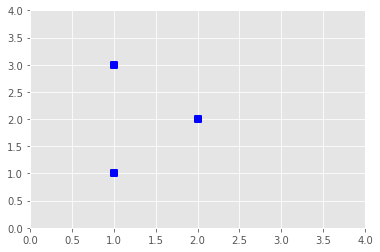

In [24]:
xval_={}
yval_={}
for n in range(ANTENNA_N):
  max_value =np.max((q_table[n]))
#print(max_value)
  for i in range(SIZE_H):
    for j in range(SIZE_W):
      for k in range(4):
        if max_value == (q_table[n][i][j][k]):
          xval_[n]=[i]
          yval_[n]=[j]
        else :
          continue
#outputOfTraining(q_table)
for n in range(ANTENNA_N):
  plt.scatter(xval_[n], yval_[n], color= "blue", linewidths =2 ,marker ="s")
plt.xlim(0, SIZE_H-1)
plt.ylim(0, SIZE_W-1)
plt.show()



In [ ]:
ANTENNA_N = int(input("please enter the number of antennas ?"))  # NUMBER OF ANTENNAS 
#width and height are points not continuous example 5,5
antennas_info_sizes={}
## splitting areas
for i in range(ANTENNA_N):
  print("attempt number",i)
  #SIZE_H=int(input("engez yallaaaa (height)!!!??"))
  SIZE_H=int(input("please enter the max height ?"))
  SIZE_W=int(input("please enter the max width?"))
  antennas_info_sizes[i+1]=[SIZE_H,SIZE_W]
print(antennas_info_sizes)
#training
print(xval,yval)

assume that power adds up (SNR) -> reward 
qtable -> add the positions of new antenna and actions 
3 antennas optimization all area 


In [ ]:
#looping on the area 
AntTest=antenna()
EveryWhere={}
max=-200
#Move antenna Every where 
for i in range(SIZE_H):
  for j in range(SIZE_W):
    AntTest.x =i
    AntTest.y = j
    AvgSnr=calSNRlow(measureSNR(AntTest,SIZE_H,SIZE_W,type="omnidirectionnel"))
    if AvgSnr>max:
      max=AvgSnr
    list_=[AntTest.x,AntTest.y,AvgSnr]
    EveryWhere[AvgSnr]=[AntTest.x,AntTest.y]
print(max,EveryWhere[max])
print(EveryWhere)
## x,y,meanSNR   